# EDA Profiling- Investigating Titanic Dataset

In [11]:
# Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [12]:
# Load data
df = pd.read_csv('titanic.csv')

In [13]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [14]:
# dropping some of the columns and rename the new data df1 where the some of the columns are droppped.

df1=df.drop(columns=['Name', 'Ticket', 'PassengerId', 'Cabin', 'Embarked'])
df1

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000
887,1,1,female,19.0,0,0,30.0000
888,0,3,female,NaN,1,2,23.4500
889,1,1,male,26.0,0,0,30.0000


In [15]:
# Move a column "Survived" to the right

last_column = df1.pop('Survived')
df1.insert(6, 'Survived', last_column)
df1

,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
0,3,male,22.0,1,0,7.2500,0
1,1,female,38.0,1,0,71.2833,1
2,3,female,26.0,0,0,7.9250,1
3,1,female,35.0,1,0,53.1000,1
4,3,male,35.0,0,0,8.0500,0
...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,0
887,1,female,19.0,0,0,30.0000,1
888,3,female,NaN,1,2,23.4500,0
889,1,male,26.0,0,0,30.0000,1


In [16]:
df1.describe()

,Pclass,Age,SibSp,Parch,Fare,Survived
count,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,2.308642,29.699118,0.523008,0.381594,32.204208,0.383838
std,0.836071,14.526497,1.102743,0.806057,49.693429,0.486592
min,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000
50%,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


In [17]:
df1['Sex'].replace({'male': 1, 'female': 0}, inplace=True)

df1.corr()

,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
Pclass,1.000000,0.131900,-0.369226,0.083081,0.018443,-0.549500,-0.338481
Sex,0.131900,1.000000,0.093254,-0.114631,-0.245489,-0.182333,-0.543351
Age,-0.369226,0.093254,1.000000,-0.308247,-0.189119,0.096067,-0.077221
SibSp,0.083081,-0.114631,-0.308247,1.000000,0.414838,0.159651,-0.035322
Parch,0.018443,-0.245489,-0.189119,0.414838,1.000000,0.216225,0.081629
Fare,-0.549500,-0.182333,0.096067,0.159651,0.216225,1.000000,0.257307
Survived,-0.338481,-0.543351,-0.077221,-0.035322,0.081629,0.257307,1.000000


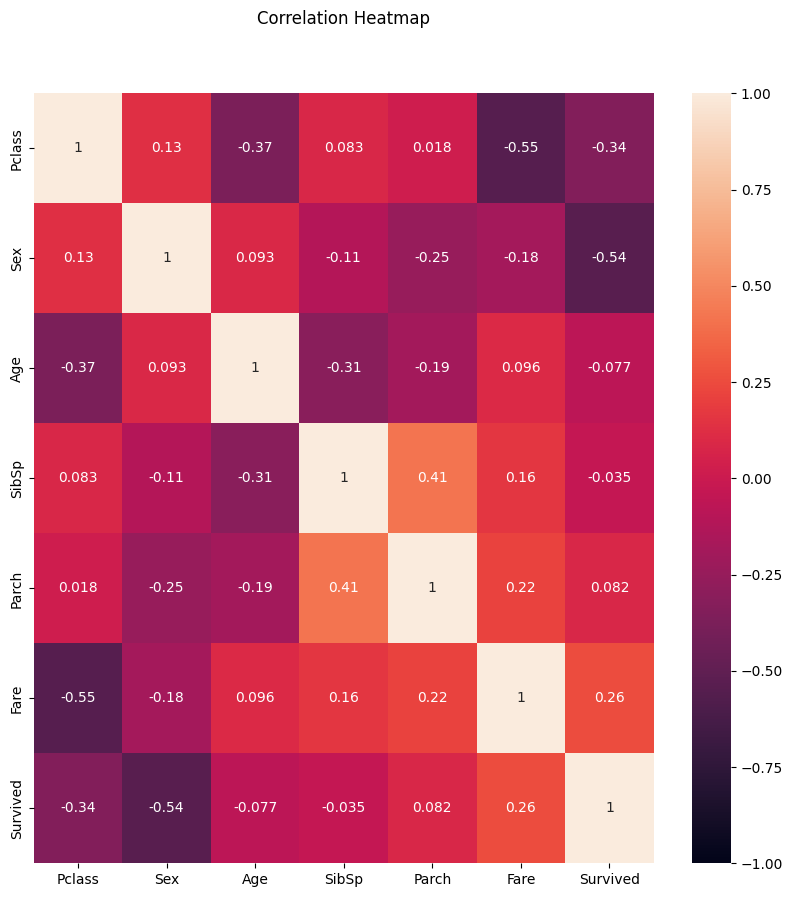

In [18]:
# https://seaborn.pydata.org/generated/seaborn.heatmap.html

plt.figure(figsize=(10,10))
heatmap = sns.heatmap(df1.corr(), vmin=-1,vmax=1,annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=50);

In [26]:
from pandas_profiling import ProfileReport

In [27]:
prof = ProfileReport(df1)

In [28]:
prof

ModuleNotFoundError: No module named 'ipywidgets'